In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# INTRODUCTION

This project focuses on healthcare worker burnout, which was described by the U.S. Department of Health and Human Services as a high degree of emotional exhaustion and a low sense of personal accomplishment at work. The effects of healthcare worker burnout are far-reaching from personal injury and illness all the way up to the worsening of societal health as patient care can suffer and workers leave the field. Prior to COVID-19, the National Academy of Medicine determined Healthcare worker burnout to be at “crisis levels” with 35-54% of nurses and doctors reporting symptoms of burnout. As we work through our analysis today, we will see how those numbers might be different now. In this project we are using a 2021 survey measuring the burnout of healthcare workers as it relates to COVID-19.  Our analysis evaluates the prevalence of burnout by occupation, career stage, workload, and demographic characteristics. We also investigated key contributing factors to burnout and how support measures enacted by the workplace affected burnout.

In [68]:
file = "Burn-Out-Questionnaire-cleaned-5.csv"
burnout_df = pd.read_csv(file)

# How do supportive measures affect burnout?
In this section we will analyze how supportive measures enacted by the workplace affects worker burnout. To do this we will start with selecting three "yes" or "no" questions the reflect the employers effort to support the healthcare worker. These questions are: 
1. Was adequate PPE provided?
2. Was mental health support available?
3. Did you receive Covid 19 specific training?

An answer of "Yes" to any of these questions would imply greater workplace support of the healthcare worker, and an answer of "No" would imply the HCW was less supported by their workplace to handle the Covid-19 emergency. These questions will be referred to as "workplace support questions".

A functional dataframe is created that will be used through out this section. 

In [5]:
support_df = burnout_df[['Designation',
                          'Adequate PPE provided?',
                          'Was mental health support available?',
                          'Received Covid 19 specific training?',
                          'Overall Average']]
support_df.head()

,Designation,Adequate PPE provided?,Was mental health support available?,Received Covid 19 specific training?,Overall Average
0,Nurse,Yes,Yes,No,51
1,Nurse,No,No,No,66
2,Nurse,Yes,Yes,Yes,68
3,Nurse,No needed,No,Yes,61
4,Nurse,No,No,No,50


In [61]:
support_df['Designation'].value_counts()

Designation
Nurse               379
Doctor              182
Physiotherapist      34
Supportive Staff     26
Radiographers        23
Name: count, dtype: int64

## (1.1) This section will read through the data by occupation, collect the value in the "Average Score" column for each "yes" and "no" answer, and calculate the mean value for each workplace support question. 

In [14]:
# This section will read through the data by occupation and collect the value in the "Average Score" column for each 
# "yes" and "no" answer and calculate the mean value for each workplace support question. 
# The foundation for this code was generated by ChatGPT

designation_list = ["Nurse", "Doctor", "Physiotherapist", "Radiographers", "Supportive Staff"]
ppe_provided_list = ["Yes", "No"]
mental_health_list = ["Yes", "No"]
covid_training_list = ["Yes", "No"]

means = {} #an empty dictionary to hold the key and value for occupational averages for yes and no answers to each question.

# a loop with embedded loop to read through each designation and each acceptable answer to the three workplace support questions
# and calculate the averages of those value and add them to the means dictionary.
for designation in designation_list:
    for ppe_provided in ppe_provided_list:
        mean_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Adequate PPE provided?"] == ppe_provided), "Overall Average"].mean()
        key = f'q1_{designation.lower()}_{ppe_provided.lower()}_mean' #creates a unique key for each mean_value
        means[key] = mean_value #add the value found and key created to the means dictionary
        
    for mental_health in mental_health_list:
        mean_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Was mental health support available?"] == mental_health), "Overall Average"].mean()
        key = f'q2_{designation.lower()}_{mental_health.lower()}_mean'
        means[key] = mean_value
        
    for covid_training in covid_training_list:
        mean_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Received Covid 19 specific training?"] == covid_training), "Overall Average"].mean()
        key = f'q3_{designation.lower()}_{covid_training.lower()}_mean'
        means[key] = mean_value

In [15]:
means

{'q1_nurse_yes_mean': 59.184357541899445,
 'q1_nurse_no_mean': 62.46666666666667,
 'q2_nurse_yes_mean': 53.971014492753625,
 'q2_nurse_no_mean': 62.81730769230769,
 'q3_nurse_yes_mean': 58.97014925373134,
 'q3_nurse_no_mean': 59.291666666666664,
 'q1_doctor_yes_mean': 53.867924528301884,
 'q1_doctor_no_mean': 63.59090909090909,
 'q2_doctor_yes_mean': 49.925,
 'q2_doctor_no_mean': 57.84070796460177,
 'q3_doctor_yes_mean': 52.94827586206897,
 'q3_doctor_no_mean': 56.20161290322581,
 'q1_physiotherapist_yes_mean': 55.333333333333336,
 'q1_physiotherapist_no_mean': 73.0,
 'q2_physiotherapist_yes_mean': 50.142857142857146,
 'q2_physiotherapist_no_mean': 63.45454545454545,
 'q3_physiotherapist_yes_mean': 50.5,
 'q3_physiotherapist_no_mean': 59.09375,
 'q1_radiographers_yes_mean': 63.22727272727273,
 'q1_radiographers_no_mean': 81.0,
 'q2_radiographers_yes_mean': 67.6,
 'q2_radiographers_no_mean': 64.07142857142857,
 'q3_radiographers_yes_mean': 76.66666666666667,
 'q3_radiographers_no_mean':

In [16]:
means['q1_supportive staff_yes_mean']

36.285714285714285

## (1.2) Calculate the average for all three questions by occupation and answer. 

In [17]:
# This section calculates the agregated average for all three questions by occupation and answer. 

nurse_yes_average = (means['q1_nurse_yes_mean'] + means['q2_nurse_yes_mean'] + means['q3_nurse_yes_mean']) / 3
nurse_no_average = (means['q1_nurse_no_mean'] + means['q2_nurse_no_mean'] + means['q3_nurse_no_mean']) / 3

doctor_yes_average = (means['q1_doctor_yes_mean'] + means['q2_doctor_yes_mean'] + means['q3_doctor_yes_mean']) / 3
doctor_no_average = (means['q1_doctor_no_mean'] + means['q2_doctor_no_mean'] + means['q3_doctor_no_mean']) / 3

physiotherapist_yes_average = (means['q1_physiotherapist_yes_mean'] + means['q2_physiotherapist_yes_mean'] +
                               means['q3_physiotherapist_yes_mean']) / 3
physiotherapist_no_average = (means['q1_physiotherapist_no_mean'] + means['q2_physiotherapist_no_mean'] +
                              means['q3_physiotherapist_no_mean']) / 3

radiographers_yes_average = (means['q1_radiographers_yes_mean'] + means['q2_radiographers_yes_mean'] +
                             means['q3_radiographers_yes_mean']) / 3
radiographers_no_average = (means['q1_radiographers_no_mean'] + means['q2_radiographers_no_mean'] +
                            means['q3_radiographers_no_mean']) / 3

supportstaff_yes_average = (means['q1_supportive staff_yes_mean'] + means['q2_supportive staff_yes_mean'] +
                            means['q3_supportive staff_yes_mean']) / 3
supportstaff_no_average = (means['q1_supportive staff_no_mean'] + means['q2_supportive staff_no_mean'] +
                           means['q3_supportive staff_no_mean']) / 3


## (1.3) Calculate average burnout score per Occupation

In [19]:
# This section caculated the average overage burnout score for each designation to be used as a baseline comparison
# against the average burnout scores for "yes" and "no" answers.

nurse_overall = support_df.loc[(support_df["Designation"] == "Nurse")]["Overall Average"].mean()
doctor_overall = support_df.loc[(support_df["Designation"] == "Doctor")]["Overall Average"].mean()
physiotherapist_overall = support_df.loc[(support_df["Designation"] == "Physiotherapist")]["Overall Average"].mean()
radiographers_overall = support_df.loc[(support_df["Designation"] == "Radiographers")]["Overall Average"].mean()
supportstaff_overall = support_df.loc[(support_df["Designation"] == "Supportive Staff")]["Overall Average"].mean()

## (1.4) Creating a grouped bar graph

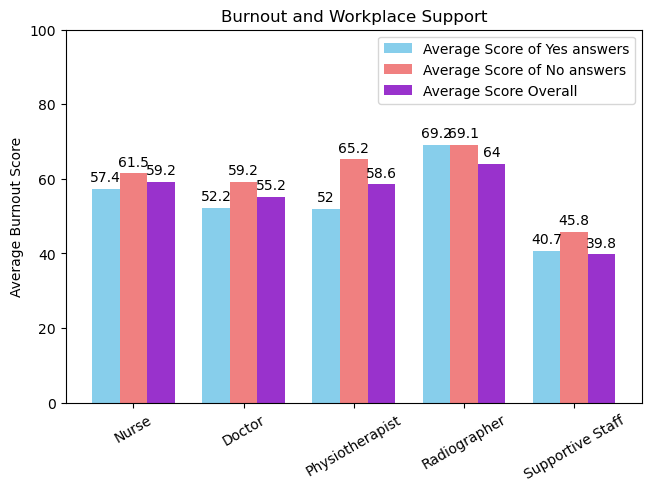

In [66]:
# Creating a grouped bar graph to visualize the average burnout score of those who answered "Yes" or "No" to 
# the workplace support questions, and compared against the overall average burnout score of each occupation.
# This code is based on a matplotlib example 
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

hcws = ("Nurse", "Doctor", "Physiotherapist", "Radiographer", "Supportive Staff")
hcw_means = {
    'Average Score of Yes answers': (round(nurse_yes_average,1), round(doctor_yes_average,1), round(physiotherapist_yes_average,1),
            round(radiographers_yes_average,1), round(supportstaff_yes_average,1)),
    'Average Score of No answers': (round(nurse_no_average,1), round(doctor_no_average,1), round(physiotherapist_no_average,1),
           round(radiographers_no_average,1), round(supportstaff_no_average,1)),
    'Average Score Overall': (round(nurse_overall,1), round(doctor_overall,1), round(physiotherapist_overall,1),
                round(radiographers_overall,1), round(supportstaff_overall,1))
}

colors = ['skyblue', 'lightcoral', 'darkorchid']

x = np.arange(len(hcws)) # how many groups there will be and where the labels will go
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained') #layout='constrained' to prevent overlapping labels

for key, value in hcw_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=key, color=colors[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Burnout Score')
ax.set_title('Burnout and Workplace Support')
ax.set_xticks(x + width, hcws, rotation=30)
ax.legend(loc='best', ncols=1)
ax.set_ylim(0, 100)


plt.show()

# Burnout and Workplace Support Grouped bar graph 
### Description and Analysis
From the data displayed in the graph above, it appears that those who answered "Yes" to any of the three questions had a lower burnout score than those who answered "No" to any of the questions. This implies that employer support in the form of adequate PPE, mental health support, and Covid-19 specific training will result in lower burnout among healthcare workers. With the notable exception of "Radiographer" which showed nearly identical burnout scores for those who answered "Yes" or "No" to the workplace support questions. This also shows Radiographers to be the most burntout overall.

# ------------------------------------------------------------------------------------------------------

# (2.1) Collecting the counts of "Yes" and "No" reponses by Occupation

In [41]:
designation_list = ["Nurse", "Doctor", "Physiotherapist", "Radiographers", "Supportive Staff"]
ppe_provided_list = ["Yes", "No"]
mental_health_list = ["Yes", "No"]
covid_training_list = ["Yes", "No"]

counts = {} #an empty dictionary to hold the counts of 'yes' and 'no' responses

for designation in designation_list:
    for ppe_provided in ppe_provided_list:
        # isolate the 'yes' and 'no' responses by occupation
        count_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Adequate PPE provided?"] == ppe_provided)] 
        sum_count = len(count_value) # count the number of responses
        key = f'q1_{designation.lower()}_{ppe_provided.lower()}_count' #create a unique key for each count
        counts[key] = sum_count
        
    for mental_health in mental_health_list:
        count_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Was mental health support available?"] == mental_health)]
        sum_count = len(count_value)
        key = f'q2_{designation.lower()}_{mental_health.lower()}_count'
        counts[key] = sum_count
        
    for covid_training in covid_training_list:
        count_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Received Covid 19 specific training?"] == covid_training)]
        sum_count = len(count_value)
        key = f'q3_{designation.lower()}_{covid_training.lower()}_count'
        counts[key] = sum_count

In [42]:
counts

{'q1_nurse_yes_count': 358,
 'q1_nurse_no_count': 15,
 'q2_nurse_yes_count': 138,
 'q2_nurse_no_count': 208,
 'q3_nurse_yes_count': 67,
 'q3_nurse_no_count': 312,
 'q1_doctor_yes_count': 159,
 'q1_doctor_no_count': 22,
 'q2_doctor_yes_count': 40,
 'q2_doctor_no_count': 113,
 'q3_doctor_yes_count': 58,
 'q3_doctor_no_count': 124,
 'q1_physiotherapist_yes_count': 27,
 'q1_physiotherapist_no_count': 6,
 'q2_physiotherapist_yes_count': 7,
 'q2_physiotherapist_no_count': 22,
 'q3_physiotherapist_yes_count': 2,
 'q3_physiotherapist_no_count': 32,
 'q1_radiographers_yes_count': 22,
 'q1_radiographers_no_count': 1,
 'q2_radiographers_yes_count': 5,
 'q2_radiographers_no_count': 14,
 'q3_radiographers_yes_count': 3,
 'q3_radiographers_no_count': 20,
 'q1_supportive staff_yes_count': 21,
 'q1_supportive staff_no_count': 4,
 'q2_supportive staff_yes_count': 7,
 'q2_supportive staff_no_count': 15,
 'q3_supportive staff_yes_count': 6,
 'q3_supportive staff_no_count': 20}

## (2.2) Create dataframes for each occupation to hold counts

In [44]:
nurse_df = pd.DataFrame({'Yes': [counts['q1_nurse_yes_count'],
                                 counts['q2_nurse_yes_count'],
                                 counts['q3_nurse_yes_count']],
                         'No': [counts['q1_nurse_no_count'],
                                counts['q2_nurse_no_count'],
                                counts['q3_nurse_no_count']],
                         'Questions': ['Adequate PPE provided?',
                                       'Was mental health support available?',
                                       'Received Covid 19 specific training?']})
nurse_df = nurse_df.set_index('Questions')

doctor_df = pd.DataFrame({'Yes': [counts['q1_doctor_yes_count'],
                                 counts['q2_doctor_yes_count'],
                                 counts['q3_doctor_yes_count']],
                         'No': [counts['q1_doctor_no_count'],
                                counts['q2_doctor_no_count'],
                                counts['q3_doctor_no_count']],
                         'Questions': ['Adequate PPE provided?',
                                       'Was mental health support available?',
                                       'Received Covid 19 specific training?']})
doctor_df = doctor_df.set_index('Questions')

physiotherapist_df = pd.DataFrame({'Yes': [counts['q1_physiotherapist_yes_count'],
                                 counts['q2_physiotherapist_yes_count'],
                                 counts['q3_physiotherapist_yes_count']],
                         'No': [counts['q1_physiotherapist_no_count'],
                                counts['q2_physiotherapist_no_count'],
                                counts['q3_physiotherapist_no_count']],
                         'Questions': ['Adequate PPE provided?',
                                       'Was mental health support available?',
                                       'Received Covid 19 specific training?']})
physiotherapist_df = physiotherapist_df.set_index('Questions')

radiographers_df = pd.DataFrame({'Yes': [counts['q1_radiographers_yes_count'],
                                 counts['q2_radiographers_yes_count'],
                                 counts['q3_radiographers_yes_count']],
                         'No': [counts['q1_radiographers_no_count'],
                                counts['q2_radiographers_no_count'],
                                counts['q3_radiographers_no_count']],
                         'Questions': ['Adequate PPE provided?',
                                       'Was mental health support available?',
                                       'Received Covid 19 specific training?']
                        })
radiographers_df = radiographers_df.set_index('Questions')

## (2.3) Create pie charts to visualize total "yes" and "no" reponses to support questions

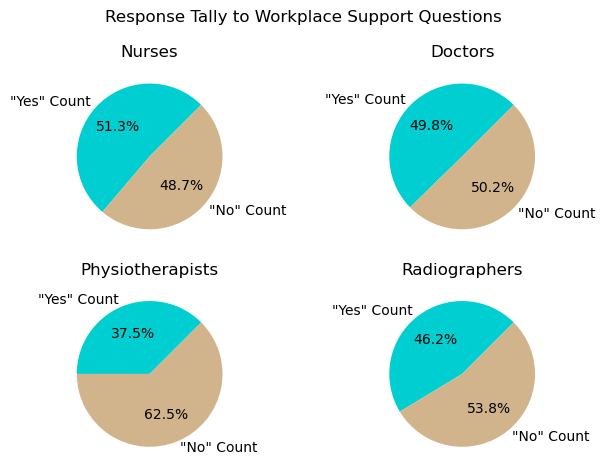

In [67]:
labels = '"Yes" Count', '"No" Count'
colors = ['darkturquoise', 'tan']

nurses = [nurse_df['Yes'].sum(), nurse_df['No'].sum()] # add the 'yes' and 'no' responses of each question to get total
doctors = [doctor_df['Yes'].sum(), doctor_df['No'].sum()]
physiotherapists = [physiotherapist_df['Yes'].sum(), physiotherapist_df['No'].sum()]
radiographers = [radiographers_df['Yes'].sum(), radiographers_df['No'].sum()]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.pie(nurses, labels=labels, autopct='%1.1f%%', colors=colors, startangle=45)
ax1.title.set_text('Nurses')
ax2.pie(doctors, labels=labels, autopct='%1.1f%%', colors=colors, startangle=45)
ax2.title.set_text('Doctors')
ax3.pie(physiotherapists, labels=labels, autopct='%1.1f%%', colors=colors, startangle=45)
ax3.title.set_text('Physiotherapists')
ax4.pie(radiographers, labels=labels, autopct='%1.1f%%', colors=colors, startangle=45)
ax4.title.set_text('Radiographers')
fig.suptitle('Response Tally to Workplace Support Questions')
plt.tight_layout()

### Description
The response tally of "Yes" and "No" answers were collected by occupation. The pie charts reveal that Physiotherapists reported the least workplace support with response percetanges of 37.5% "Yes" and 62.5% "No".